# Loading Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Data Analysis

In [705]:
train_X = pd.read_csv("F:\Surya\Project\data.csv")
train_y = pd.DataFrame(train_X['Survived'])
train_X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [706]:
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [707]:
print(train_X.shape)

(891, 12)


In [708]:
train_X.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


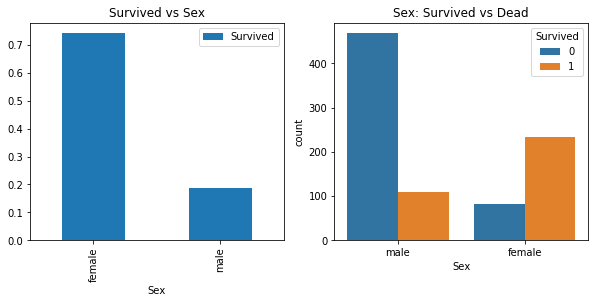

In [709]:
f,ax=plt.subplots(1,2,figsize=(10,4))
train_X[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=train_X,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [710]:
train_X.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


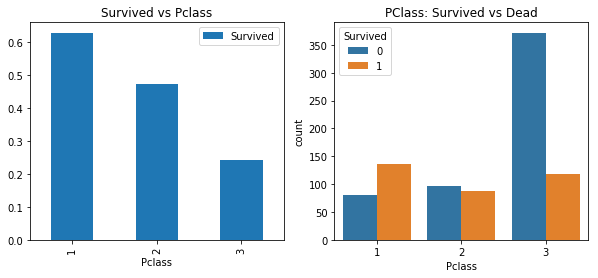

In [711]:
f,ax=plt.subplots(1,2,figsize=(10,4))
train_X[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Pclass')
sns.countplot(x='Pclass',hue='Survived',data=train_X,ax=ax[1])
ax[1].set_title('PClass: Survived vs Dead')
plt.show()

In [712]:
train_X.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


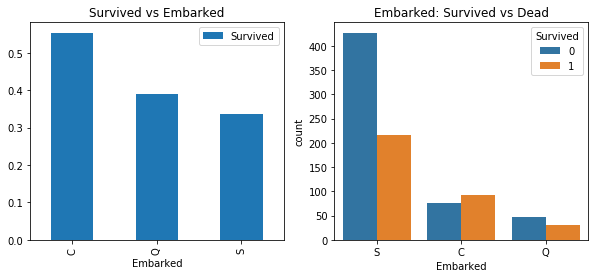

In [713]:
f,ax=plt.subplots(1,2,figsize=(10,4))
train_X[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Embarked')
sns.countplot(x='Embarked',hue='Survived',data=train_X,ax=ax[1])
ax[1].set_title('Embarked: Survived vs Dead')
plt.show()

In [714]:
train_X.groupby(['Pclass','Sex']).mean()['Survived']


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

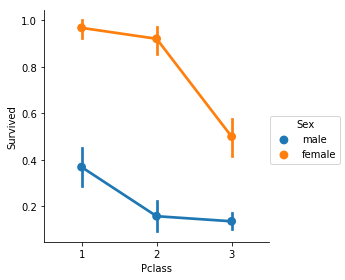

In [715]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_X)
plt.show()

In [716]:
train_X.groupby(['Embarked','Sex']).mean()['Survived']

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64

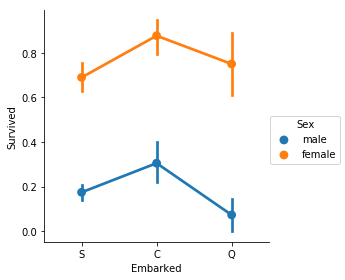

In [717]:
sns.factorplot('Embarked','Survived',hue='Sex',data=train_X)
plt.show()

In [718]:
train_X.groupby(['Pclass','Embarked','Sex']).mean()['Survived']

Pclass  Embarked  Sex   
1       C         female    0.976744
                  male      0.404762
        Q         female    1.000000
                  male      0.000000
        S         female    0.958333
                  male      0.354430
2       C         female    1.000000
                  male      0.200000
        Q         female    1.000000
                  male      0.000000
        S         female    0.910448
                  male      0.154639
3       C         female    0.652174
                  male      0.232558
        Q         female    0.727273
                  male      0.076923
        S         female    0.375000
                  male      0.128302
Name: Survived, dtype: float64

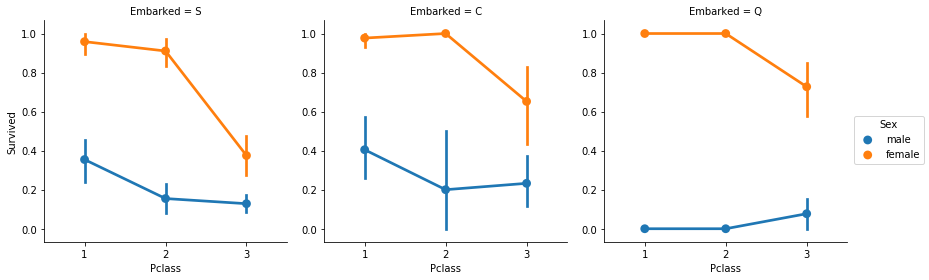

In [719]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_X)
plt.show()

In [720]:
train_X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleansing/ Feature Engineering/ Data Preparation

In [721]:
train_X.drop(['Fare','Ticket','Cabin','Survived'],axis=1,inplace=True)
train_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [722]:
train_X['Relatives'] = train_X['SibSp']+train_X['Parch']
train_X.drop(['SibSp','Parch'],axis=1,inplace=True)
train_X.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked,Relatives
0,1,3,"Braund, Mr. Owen Harris",male,22.0,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,S,0


In [723]:
train_X['Title'] = train_X.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_X['Title'], train_X['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [724]:
train_X['Title'] = train_X.Name.str.extract(' ([A-za-z]+)\.',expand = False)
train_X['Title'] = train_X['Title'].replace([ 'Col','Countess','Major','Capt', 'Don', 'Dr',\
                                              'Jonkheer','Rev', 'Sir','Lady', 'Dona'], 'Random')
titles = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Random": 5}
train_X['Title'] =train_X['Title'].map(titles)
train_X['Title'].fillna(0,inplace=True)
train_X['Title'] = train_X['Title'].astype(int)
train_X.drop('Name',axis = 1,inplace=True)
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Relatives,Title
0,1,3,male,22.0,S,1,1
1,2,1,female,38.0,C,1,3
2,3,3,female,26.0,S,0,4
3,4,1,female,35.0,S,1,3
4,5,3,male,35.0,S,0,1


In [725]:
train_X['Family'] = 'Small'
train_X.loc[train_X['Relatives']==0,'Family']='Alone'
train_X.loc[train_X['Relatives']>=5,'Family']='Big'
train_X['Survived'] = train_y['Survived']
train_X.groupby('Family').mean()['Survived']

Family
Alone    0.303538
Big      0.148936
Small    0.560261
Name: Survived, dtype: float64

In [726]:
family  = {'Alone':0,'Small':1,'Big':2}
train_X['Family'] = train_X['Family'].map(family)
train_X.drop('Relatives',axis=1,inplace =True)
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Survived
0,1,3,male,22.0,S,1,1,0
1,2,1,female,38.0,C,3,1,1
2,3,3,female,26.0,S,4,0,1
3,4,1,female,35.0,S,3,1,1
4,5,3,male,35.0,S,1,0,0


In [727]:
train_X['Child']=0
train_X.loc[train_X['Age']<1,'Child']=1
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Survived,Child
0,1,3,male,22.0,S,1,1,0,0
1,2,1,female,38.0,C,3,1,1,0
2,3,3,female,26.0,S,4,0,1,0
3,4,1,female,35.0,S,3,1,1,0
4,5,3,male,35.0,S,1,0,0,0


In [728]:
train_X.loc[train_X['Sex']=='male','Sex']=1
train_X.loc[train_X['Sex']=='female','Sex']=0
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Survived,Child
0,1,3,1,22.0,S,1,1,0,0
1,2,1,0,38.0,C,3,1,1,0
2,3,3,0,26.0,S,4,0,1,0
3,4,1,0,35.0,S,3,1,1,0
4,5,3,1,35.0,S,1,0,0,0


In [729]:
train_X['Alone']=0
train_X.loc[train_X['Family']==0,'Alone']=1
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Survived,Child,Alone
0,1,3,1,22.0,S,1,1,0,0,0
1,2,1,0,38.0,C,3,1,1,0,0
2,3,3,0,26.0,S,4,0,1,0,1
3,4,1,0,35.0,S,3,1,1,0,0
4,5,3,1,35.0,S,1,0,0,0,1


In [730]:
m = train_X['Age'].mean()
s = train_X['Age'].std()
i = m-s
n = m+s
i= int(i)
n = int(n)
r = np.random.randint(i,m,len(train_X['Age'][np.isnan(train_X['Age'])]))
train_X['Age'][np.isnan(train_X['Age'])] = r
train_X.head()

C:\Users\Prabhakaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Survived,Child,Alone
0,1,3,1,22.0,S,1,1,0,0,0
1,2,1,0,38.0,C,3,1,1,0,0
2,3,3,0,26.0,S,4,0,1,0,1
3,4,1,0,35.0,S,3,1,1,0,0
4,5,3,1,35.0,S,1,0,0,0,1


In [731]:
train_X['Age_range'] = pd.cut(train_X['Age'],5)   
train_X.groupby(['Age_range']).mean()['Survived']

Age_range
(0.34, 16.336]      0.469231
(16.336, 32.252]    0.352941
(32.252, 48.168]    0.404255
(48.168, 64.084]    0.434783
(64.084, 80.0]      0.090909
Name: Survived, dtype: float64

In [732]:
train_X.loc[train_X['Age']<=16,'Age']=0
train_X.loc[(train_X['Age'] > 16) & (train_X['Age'] <= 32), 'Age'] = 1
train_X.loc[(train_X['Age']>32) & (train_X['Age']<=48),'Age']=2
train_X.loc[(train_X['Age']>48) & (train_X['Age']<=64),'Age']=3
train_X.loc[train_X['Age']>64 ,'Age']=4
train_X['Age'] = train_X['Age'].astype(int)
train_X.drop('Age_range',axis=1,inplace=True)
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Survived,Child,Alone
0,1,3,1,1,S,1,1,0,0,0
1,2,1,0,2,C,3,1,1,0,0
2,3,3,0,1,S,4,0,1,0,1
3,4,1,0,2,S,3,1,1,0,0
4,5,3,1,2,S,1,0,0,0,1


In [733]:
train_X.dropna(inplace=True)

In [734]:
train_X.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Embarked       0
Title          0
Family         0
Survived       0
Child          0
Alone          0
dtype: int64

In [735]:
train_X.dropna(inplace=True)
train_X.loc[train_X['Embarked']=='C','Embarked']=0
train_X.loc[train_X['Embarked']=='Q','Embarked']=1
train_X.loc[train_X['Embarked']=='S','Embarked']=2
train_X = train_X[:].astype(int)
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Survived,Child,Alone
0,1,3,1,1,2,1,1,0,0,0
1,2,1,0,2,0,3,1,1,0,0
2,3,3,0,1,2,4,0,1,0,1
3,4,1,0,2,2,3,1,1,0,0
4,5,3,1,2,2,1,0,0,0,1


In [736]:
train_y = train_X['Survived']
c = ['PassengerId','Pclass','Sex','Age','Embarked','Title','Family','Child','Alone']
train_X = train_X[c]
train_X.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family,Child,Alone
0,1,3,1,1,2,1,1,0,0
1,2,1,0,2,0,3,1,0,0
2,3,3,0,1,2,4,0,0,1
3,4,1,0,2,2,3,1,0,0
4,5,3,1,2,2,1,0,0,1


# Predictive Modelling

# Logistic Regression

Accuracy = 79.4126659857


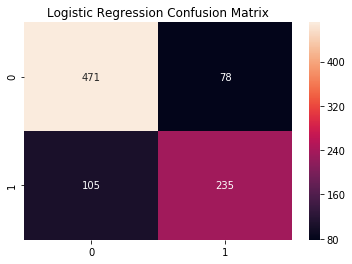

In [769]:
model  = LogisticRegression()
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('Accuracy = '+str(result.mean()*100))
y_pred = cross_val_predict(model,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='1.0f')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Support Vector Machine(SVM)

Accuracy = 62.2037793667


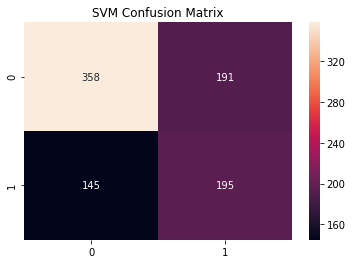

In [784]:
model = svm.SVC(C = 100,gamma=0.0001,kernel = 'rbf')
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('Accuracy = '+str(result.mean()*100))
y_pred = cross_val_predict(model,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='1.0f')
plt.title('SVM Confusion Matrix')
plt.show()

# Decision Tree Classifier

Accuracy = 79.7574055158


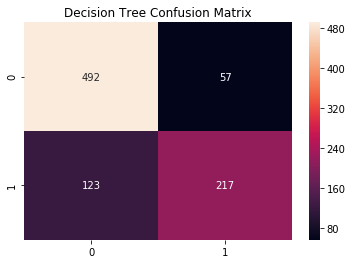

In [783]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=3)
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('Accuracy = '+str(result.mean()*100))
y_pred = cross_val_predict(model,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='1.0f')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Random Forest Classifier

Accuracy = 80.5426455567


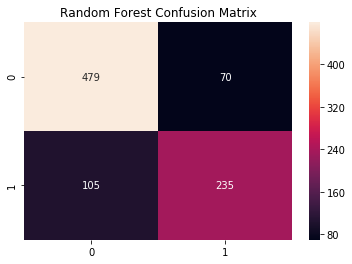

In [786]:
model = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=10,min_samples_split=3)
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('Accuracy = '+str(result.mean()*100))
y_pred = cross_val_predict(model,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='1.0f')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Adaptive Boosting

Accuracy = 70.0919305414


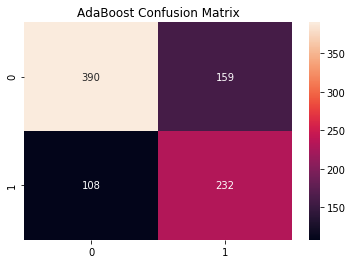

In [785]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=3)
model = AdaBoostClassifier(n_estimators = 200,learning_rate = 0.007,base_estimator = dt)
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('Accuracy = '+str(result.mean()*100))
y_pred = cross_val_predict(model,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='1.0f')
plt.title('AdaBoost Confusion Matrix')
plt.show()

# Gradient Boosting

Accuracy = 83.0183861083


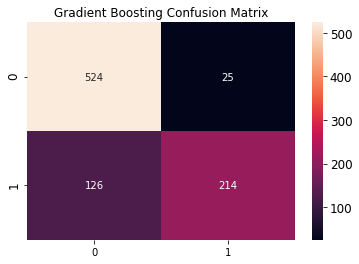

In [809]:
model = GradientBoostingClassifier(n_estimators = 120,learning_rate = 0.01)
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('Accuracy = '+str(result.mean()*100))
y_pred = cross_val_predict(model,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='1.0f')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Extreme Gradient Boosting(XGBoost)

Accuracy = 82.0071501532


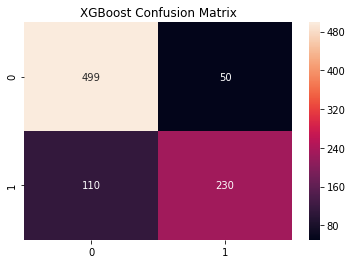

In [788]:
model = XGBClassifier(n_estimators = 300,learning_rate=0.007)
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('Accuracy = '+str(result.mean()*100))
y_pred = cross_val_predict(model,train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),annot=True,fmt='1.0f')
plt.title('XGBoost Confusion Matrix')
plt.show()

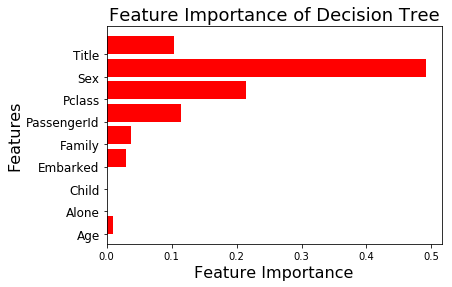

In [799]:
model  =  DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=3)
model.fit(train_X,train_y)
pyplot.barh(train_X.columns, model.feature_importances_,align = 'edge',linewidth = 5,color = 'red')
pyplot.xlabel('Feature Importance',fontsize=16)
pyplot.ylabel('Features',fontsize=16)
pyplot.title('Feature Importance of Decision Tree',fontsize=18)
pyplot.rc('ytick',labelsize = 12)
pyplot.show()

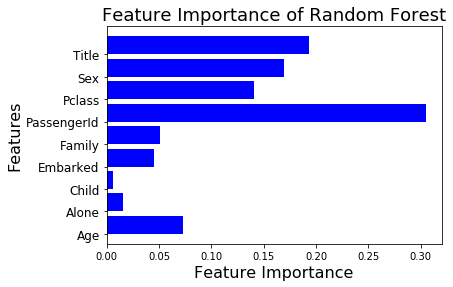

In [800]:
model  = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=10,min_samples_split=3)
model.fit(train_X,train_y)
pyplot.barh(train_X.columns, model.feature_importances_,align = 'edge',linewidth = 5,color = 'blue')
pyplot.xlabel('Feature Importance',fontsize=16)
pyplot.ylabel('Features',fontsize=16)
pyplot.title('Feature Importance of Random Forest',fontsize=18)
pyplot.rc('ytick',labelsize = 12)
pyplot.show()

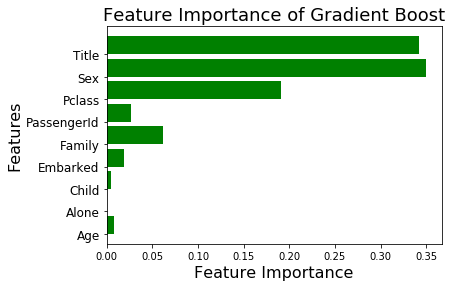

In [805]:
model = GradientBoostingClassifier(n_estimators = 120,learning_rate = 0.01)
model.fit(train_X,train_y)
pyplot.barh(train_X.columns, model.feature_importances_,align = 'edge',linewidth = 5,color = 'green')
pyplot.xlabel('Feature Importance',fontsize=16)
pyplot.ylabel('Features',fontsize=16)
pyplot.title('Feature Importance of Gradient Boost',fontsize=18)
pyplot.rc('ytick',labelsize = 12)
pyplot.show()

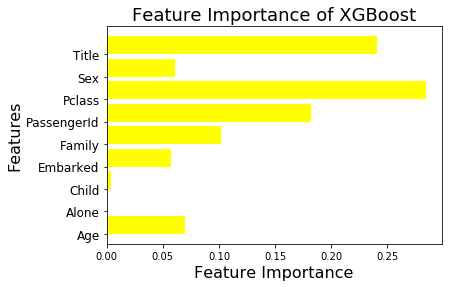

In [808]:
model = XGBClassifier(n_estimators = 300,learning_rate=0.007)
model.fit(train_X,train_y)
pyplot.barh(train_X.columns, model.feature_importances_,align = 'edge',linewidth = 5,color = 'yellow')
pyplot.xlabel('Feature Importance',fontsize=16)
pyplot.ylabel('Features',fontsize=16)
pyplot.title('Feature Importance of XGBoost',fontsize=18)
pyplot.rc('ytick',labelsize = 12)
pyplot.show()